In [272]:
import pandas as pd

In [273]:
import numpy as np

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df=pd.read_csv('UberDataset.csv')

In [276]:
df


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [277]:
df.shape

(1156, 7)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Preprocessing 

In [279]:
df['PURPOSE'].fillna("NOT", inplace=True)

In [280]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [281]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')

In [282]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [284]:
from datetime import datetime

df['Date']=pd.DatetimeIndex(df['START_DATE']).date

In [285]:
df['Time']=pd.DatetimeIndex(df['START_DATE']).hour

In [286]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,2016-12-31,22.0


In [287]:
df['Day-Night']=pd.cut(x=df['Time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [288]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13.0,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15.0,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21.0,Night
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,2016-12-31,22.0,Night


In [289]:
df.dropna(inplace=True)

In [290]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1.0,Morning
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13.0,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15.0,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21.0,Night


In [291]:
print(df['CATEGORY'].unique())

['Business' 'Personal']


In [292]:
print(df['CATEGORY'].dtype)

object


# Data Visualization 

Text(0, 0.5, 'Count')

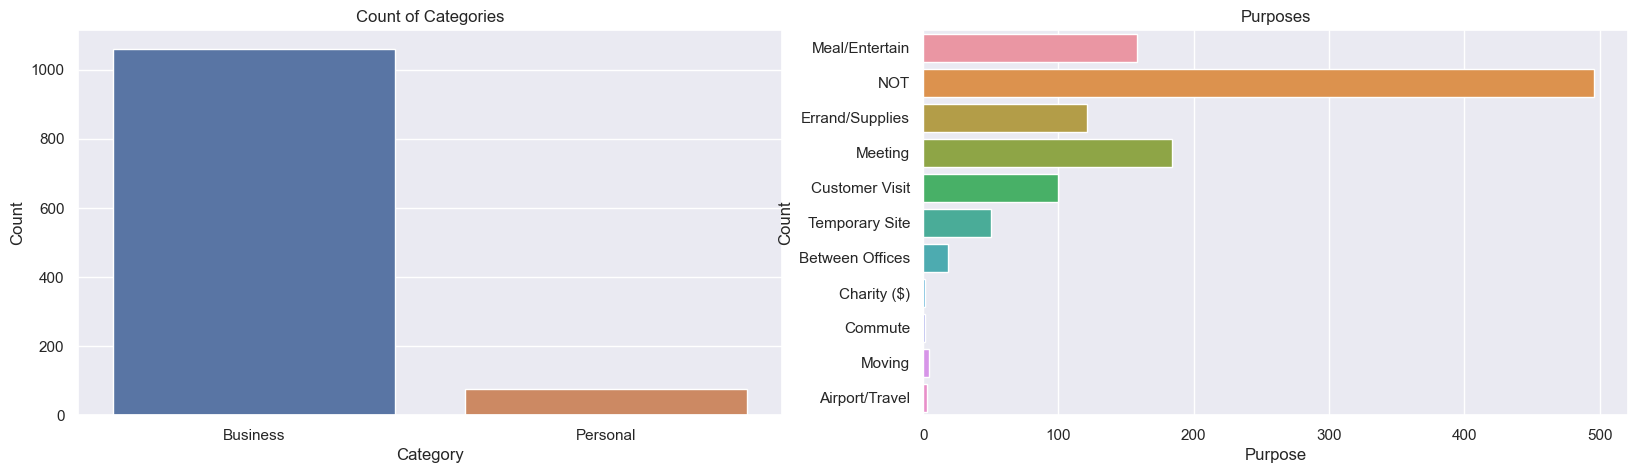

In [293]:
plt.figure(figsize=(20, 5))

# Subplot for CATEGORY
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=df)
sns.set(rc={'figure.figsize':(1,1)})
plt.title("Count of Categories")
plt.xlabel("Category")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.countplot(y='PURPOSE',data=df)
sns.set(rc={'figure.figsize':(15,5)})
plt.title("Purposes")
plt.xlabel("Purpose")
plt.ylabel("Count")



Text(0, 0.5, 'Day-Night')

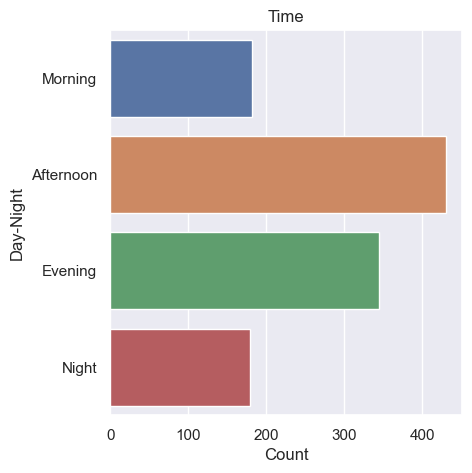

In [294]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)


sns.countplot(y='Day-Night',data=df)
plt.title("Time")
plt.xlabel("Count")
plt.ylabel("Day-Night")

In [295]:
df['Month']=pd.DatetimeIndex(df['START_DATE']).month

month_label={1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'June',7.0:'July',8.0:'Aug',9.0:'Sept',10.0:'Oct',11.0:'Nov',12.0:'Dec'}

df['Month']=df.Month.map(month_label)

mon=df.Month.value_counts(sort=False)

In [296]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1.0,Morning,Dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13.0,Afternoon,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15.0,Afternoon,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21.0,Night,Dec


In [297]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Date', 'Time', 'Day-Night', 'Month'],
      dtype='object')

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Values Count')]

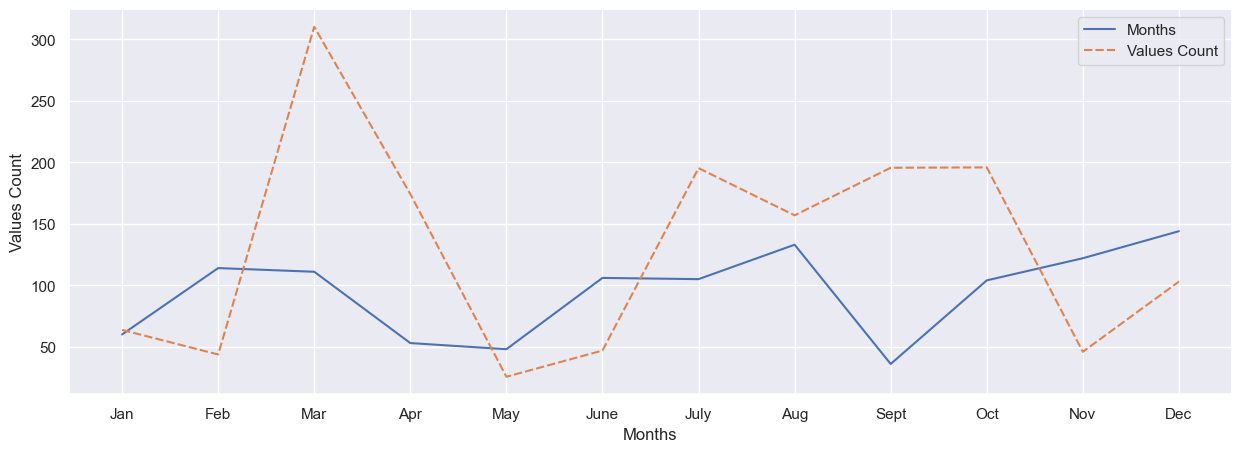

In [312]:
df=pd.DataFrame({'Months':mon.values,
                'Values Count':df.groupby('Month',sort=False)['MILES'].max()
                })

p=sns.lineplot(data=df)
p.set(xlabel='Months',ylabel='Values Count')

In [299]:
df['DAY']=df.START_DATE.dt.weekday

day_label={
    0:'Mon' ,1:'Tues' , 2:'Wed' , 3:'Thu',4:'Fri',5:'Sat',6:'Sun'
}

df['DAY']=df['DAY'].map(day_label)

In [300]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,Month,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1.0,Morning,Dec,Sat
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13.0,Afternoon,Dec,Sat
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15.0,Afternoon,Dec,Sat
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21.0,Night,Dec,Sat


Text(0, 0.5, 'COUNT')

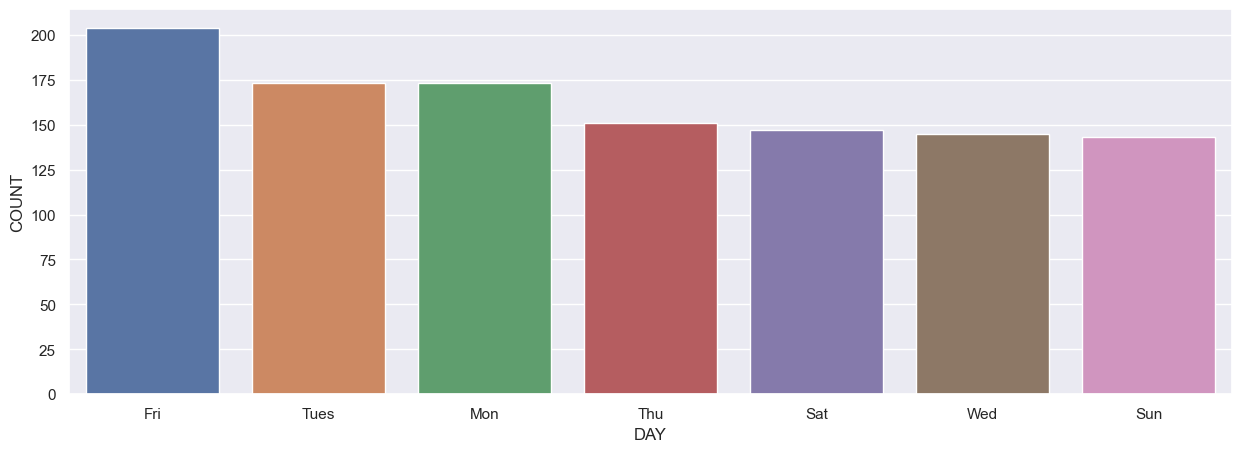

In [301]:
day_label=df.DAY.value_counts()

sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [302]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,Month,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


<Axes: >

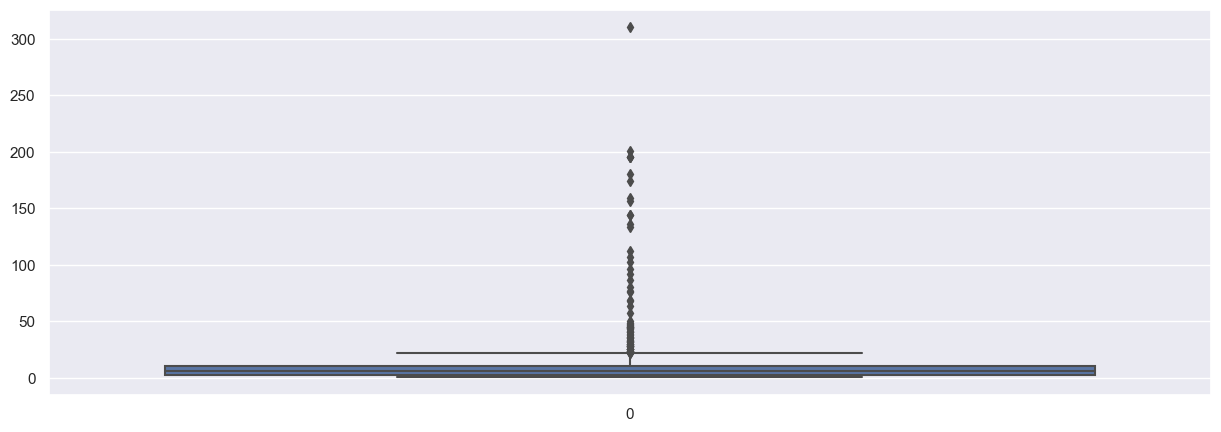

In [303]:
sns.boxplot(df['MILES'])

<Axes: >

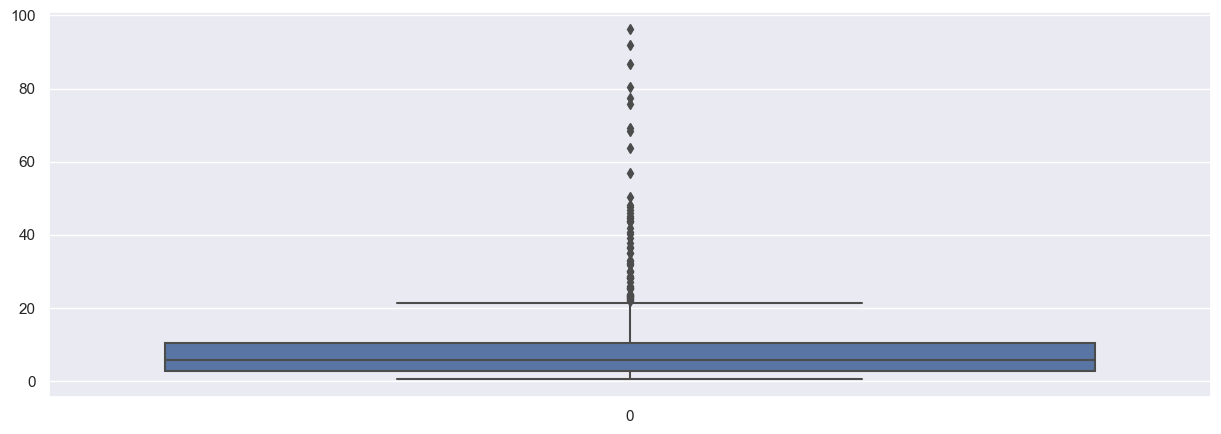

In [305]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: >

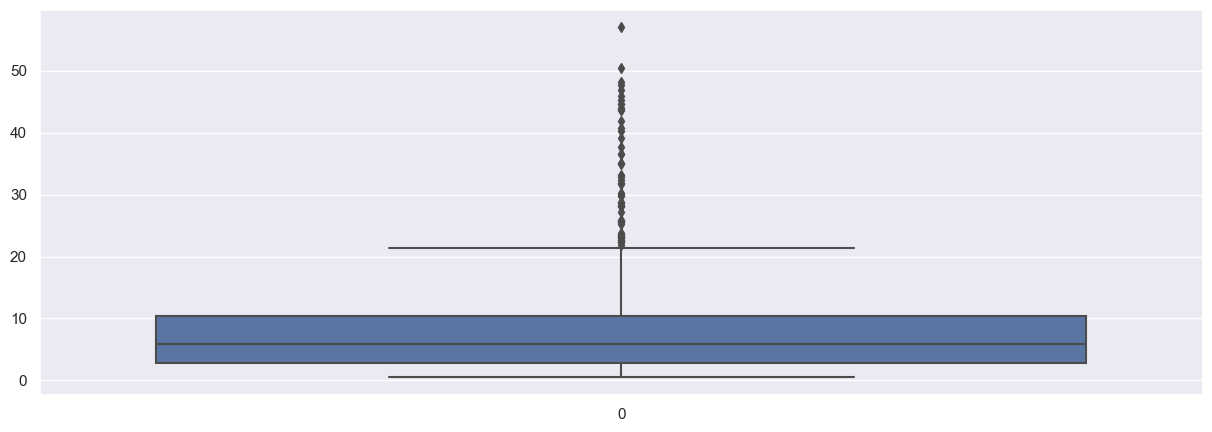

In [308]:
sns.boxplot(df[df['MILES']<60]['MILES'])

C:\Users\mahad\AppData\Local\Temp\ipykernel_3756\1061741287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<60]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

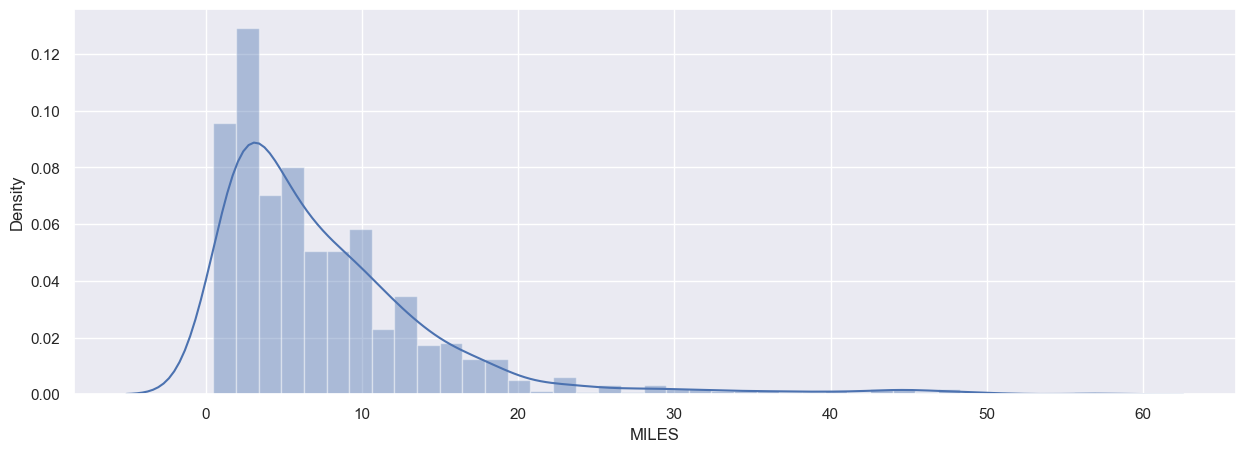

In [310]:
sns.distplot(df[df['MILES']<60]['MILES'])

In [313]:
import pandas as pd

# Summary table
analysis_data = {
    "Question": [
        "Most popular category for bookings?",
        "Most common purpose for bookings?",
        "Most frequent time of day for bookings?",
        "Months with the least frequent bookings?",
        "Most popular day of the week for bookings?",
        "Typical distance of rides?"
    ],
    "Insight": [
        "Business",
        "Meeting",
        "Afternoon",
        "January, November",
        "Friday",
        "0 to 30 miles"
    ]
}

df_analysis = pd.DataFrame(analysis_data)
display(df_analysis)


,Question,Insight
0,Most popular category for bookings?,Business
1,Most common purpose for bookings?,Meeting
2,Most frequent time of day for bookings?,Afternoon
3,Months with the least frequent bookings?,"January, November"
4,Most popular day of the week for bookings?,Friday
5,Typical distance of rides?,0 to 30 miles


## Analysis Summary

### 1. Most Popular Category for Booking Uber Rides
The majority of Uber rides are booked under the **Business** category.
#### Interpretation:
This indicates that Uber is frequently used for professional purposes, likely due to convenience and expense tracking features.

### 2. Most Common Purpose for Booking Uber Rides
The most frequent purpose for booking Uber rides is **Meeting**.
#### Interpretation: 
This suggests that professionals rely on Uber for attending meetings, possibly to save time and avoid parking issues.

### 3. Most Frequent Time of Day for Booking Uber Rides
Uber rides are booked the most during the **Afternoon**.
#### Interpretation:
This aligns with peak business hours, when professionals and individuals are traveling for work, meetings, or personal errands.

### 4. Months with the Least Frequent Bookings
The months **January and November** see the least number of bookings.
#### Interpretation: 
This could be attributed to seasonal factors such as holidays, reduced travel during cold months, or year-end budget constraints.

### 5. Most Popular Day of the Week for Booking Rides
Uber rides are most frequently booked on **Fridays**.
#### Interpretation:
This aligns with end-of-week activities, such as commuting for work, social outings, or weekend travel plans.

### 6. Typical Distance of Uber Rides
The majority of rides fall within the **0 to 30 miles range**.
#### Interpretation: 
This indicates that Uber is primarily used for short to medium-distance trips, likely for local commuting and errands.